<a href="https://colab.research.google.com/github/arifroska/PrakAPM/blob/main/Decision_Tree_C4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import file
from google.colab import files
uploaded = files.upload()

Saving survey lung cancer.csv to survey lung cancer.csv


In [ ]:
#import library
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn  as sns
import pydotplus
from IPython.display import Image
import io

#import file
data = pd.read_csv(io.BytesIO(uploaded['survey lung cancer.csv']), header=0)
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
#menentukan variabel dependen dan independen
import numpy as np
# dict_cancer = {
#     'YES' : 2,
#     'NO' : 1
# }
# data['Lung_Cancer'] = data['LUNG_CANCER'].apply(lambda x : dict_cancer[x])

feature_cols = ['SMOKING', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING','COUGHING']
x = data[feature_cols]
y = data['CHEST PAIN']

print (x)
print (y)

     SMOKING  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING
0          1         2         1         2                  2         2
1          2         2         2         1                  1         1
2          1         2         1         2                  1         2
3          2         1         1         1                  2         1
4          1         1         1         2                  1         2
..       ...       ...       ...       ...                ...       ...
304        1         2         1         1                  2         2
305        2         2         2         2                  2         2
306        2         1         2         2                  2         2
307        2         2         2         1                  2         2
308        1         2         2         2                  2         1

[309 rows x 6 columns]
0      2
1      2
2      2
3      2
4      1
      ..
304    1
305    2
306    2
307    2
308    1
Name: CHEST P

In [ ]:
#membagi data train dan data test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)

In [ ]:
#membuat model decision tree
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print("Hasil Akurasi:",metrics.accuracy_score(y_test,y_pred))

Hasil Akurasi: 0.7580645161290323


In [ ]:
hasil = tree.DecisionTreeClassifier(criterion='entropy')
data['CHEST PAIN'] = data['CHEST PAIN'].astype(float)
hasil_train = hasil.fit(x, data['CHEST PAIN'])

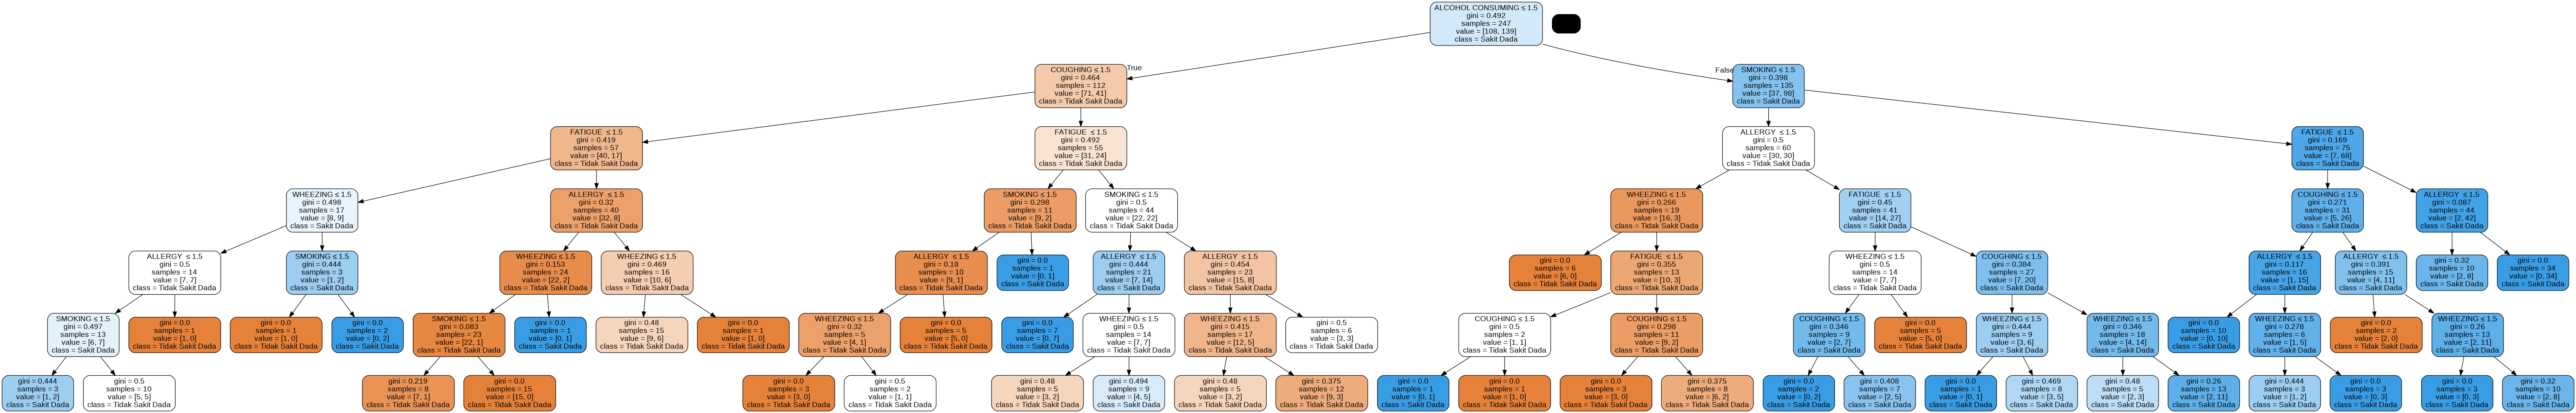

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Tidak Sakit Dada','Sakit Dada'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Lung Cancer.png')
Image(graph.create_png())

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  f1_score

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[19 10]
 [ 5 28]]


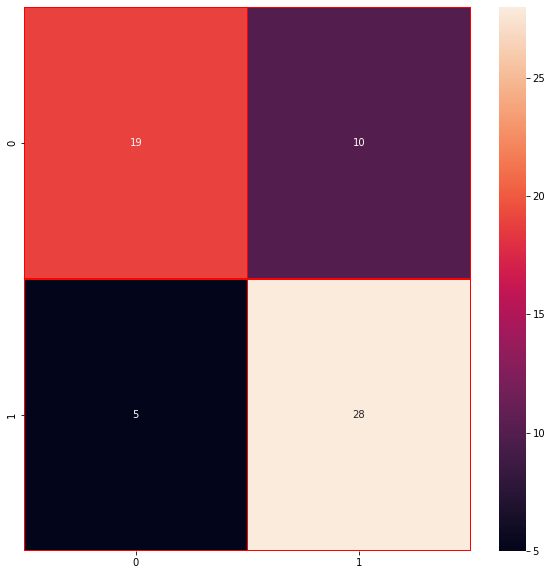

<Figure size 432x288 with 0 Axes>

In [ ]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

In [ ]:
print(classification_report(y_test, y_pred))
f1_score = f1_score(y_test, y_pred)
print("F1 Score:",f1_score)

              precision    recall  f1-score   support

           1       0.79      0.66      0.72        29
           2       0.74      0.85      0.79        33

    accuracy                           0.76        62
   macro avg       0.76      0.75      0.75        62
weighted avg       0.76      0.76      0.76        62

F1 Score: 0.7169811320754716
